## NCAA March Madness Prediction (Pt. 3)

In [1]:
import numpy as np
import pandas as pd
import time
from colorama import Fore

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Part 1: Import Training Data

In [2]:
data = pd.read_csv("data/train_data.csv")
print("Shape:",data.shape)
print("Columns:", data.columns.values)

X = data[data.columns.difference(["w_l"])]
Y = (data.w_l == "W") # Defining 1 as Win, 0 as Loss

data.head(3)

Shape: (9435, 66)
Columns: ['3P' '3PA' '3PAr' 'AST' 'AST%' 'BLK' 'BLK%' 'FG' 'FGA' 'FT' 'FT/FGA'
 'FTA' 'FTr' 'L' 'L.1' 'L.2' 'L.3' 'MP' 'ORB' 'ORB%' 'ORtg' 'Opp.'
 'Opp_3P' 'Opp_3PA' 'Opp_3PAr' 'Opp_AST' 'Opp_AST%' 'Opp_BLK' 'Opp_BLK%'
 'Opp_FG' 'Opp_FGA' 'Opp_FT' 'Opp_FT/FGA' 'Opp_FTA' 'Opp_FTr' 'Opp_ORB'
 'Opp_ORB%' 'Opp_ORtg' 'Opp_PF' 'Opp_Pace' 'Opp_STL' 'Opp_STL%' 'Opp_TOV'
 'Opp_TOV%' 'Opp_TRB' 'Opp_TRB%' 'Opp_TS%' 'Opp_eFG%' 'PF' 'Pace' 'SOS'
 'SRS' 'STL' 'STL%' 'TOV' 'TOV%' 'TRB' 'TRB%' 'TS%' 'Tm.' 'W' 'W.1' 'W.2'
 'W.3' 'eFG%' 'w_l']


,3P,3PA,3PAr,AST,AST%,BLK,BLK%,FG,FGA,FT,...,TRB,TRB%,TS%,Tm.,W,W.1,W.2,W.3,eFG%,w_l
0,5.0,-5.0,0.51,-3.80,2.0,-2.0,2.0,-1.0,2.0,-4.0,...,-0.045,-1.1,-3.6,0.9,-1.8,-0.059,2.7,-2.3,0.052,W
1,-7.0,6.0,-7.04,-3.02,-2.0,6.0,-4.0,4.0,-4.0,2.0,...,-0.004,2.5,-1.3,-0.1,-4.2,-0.012,1.7,4.5,0.039,L
2,-2.0,0.0,-3.46,-0.14,-2.0,2.0,-5.0,2.0,2.0,-2.0,...,0.000,-1.2,-1.3,0.0,-1.2,-0.007,3.5,1.9,0.063,W


### Part 2: PCA Analysis

In [3]:
n = X.shape[0]
features_mean = np.mean(X, axis=0)
normalized_features = (X - features_mean) / np.sqrt(n)

u, s, vt = np.linalg.svd(normalized_features, full_matrices=False)
u.shape, s, vt.shape

((9435, 65),
 array([5.74554163e+02, 2.24804240e+02, 1.99489108e+02, 1.74952695e+02,
        1.36269474e+02, 1.13379907e+02, 1.00515906e+02, 9.69395526e+01,
        8.80620889e+01, 6.65868261e+01, 6.12051413e+01, 4.68094486e+01,
        4.55688425e+01, 3.33808168e+01, 3.04723534e+01, 2.71221927e+01,
        2.40548652e+01, 2.30477648e+01, 2.21722772e+01, 1.79055616e+01,
        1.71407030e+01, 1.60929841e+01, 1.45513784e+01, 1.34467231e+01,
        9.66454385e+00, 8.29500241e+00, 6.38005115e+00, 5.18758406e+00,
        4.04780224e+00, 3.27187575e+00, 2.34351342e+00, 1.71210559e+00,
        1.06502432e+00, 8.92370919e-01, 8.08291664e-01, 7.62380534e-01,
        7.22370039e-01, 6.50180513e-01, 5.56703999e-01, 4.72457708e-01,
        4.22081334e-01, 3.65741198e-01, 2.94662555e-01, 2.58269118e-01,
        2.51028610e-01, 2.04789651e-01, 1.87640535e-01, 1.56934297e-01,
        1.42667505e-01, 1.38029053e-01, 1.15919375e-01, 7.41823177e-02,
        6.13823072e-02, 6.64164509e-03, 6.00145296e

In [4]:
total_variance = np.sum(np.square(s))
feature_variance = np.sum(np.var(X, axis=0))
print("Total Variance:", total_variance)
print("Feature Variance:", feature_variance)
print("Two should be approximately equal")

Total Variance: 528097.8607504097
Feature Variance: 528097.8607504084
Two should be approximately equal


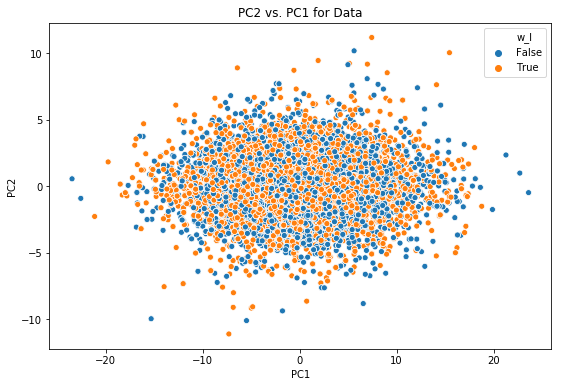

In [5]:
# Virualizing data with principal components
num_of_components = 2
X_comp = np.dot(normalized_features, vt[:num_of_components, :].T)

plt.figure(figsize=(9,6))
plt.title("PC2 vs. PC1 for Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
sns.scatterplot(X_comp[:, 0], X_comp[:, 1], hue=Y)

# Not great separation! Explains why part 4 initial results are not great.

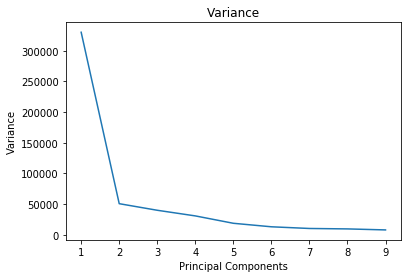

In [14]:
# Scree Plot Visualization
plt.xticks(list(range(1, 10)))
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.title('Variance')
plt.plot(list(range(1, 10)), np.square(s[0:9]))